### HOMEWORK 3 - K MEANS IMPLEMENTATION - IRIS AND IMAGE CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.utils import shuffle
import random
from copy import deepcopy
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cityblock

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Used to alculate the norm of vector or matrix
def normDist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
def KMeans(k, X, Y, clusters, dist_err):
    while dist_err != 0:
        yprev = deepcopy(Y)
        for i in range(len(X)):
            clusters[i] = np.argmin(normDist(X[i], Y))
        for j in range(k):
            Y[j] = np.mean([X[x] for x in range(len(X)) if clusters[x] == j], axis = 0)
        dist_err = normDist(Y, yprev, None)
    return clusters

In [4]:
# Applying PCA - Principal Component Analysis to reduce dimentionality
def pca(data):
    red_dim = PCA(n_components = len(X))
    #red_dim = TruncatedSVD(n_components=500, random_state=42)
    pca_data = red_dim.fit_transform(data)
    return pca_data

In [5]:
# Applying TSNE - Used to understand high-dimensional data and fit into low-dimensional space
def tsne(data):
    tsne_data = TSNE(n_components=2,init='random').fit_transform(X)
    return tsne_data

### PART 1 - IRIS CLUSTERING

In [6]:
#Loading Test Data for IRIS Dataset
data = ["SepalLength","SepalWidth","PetalLength","PetalWidth"]
test1 = pd.read_csv("/Users/sanjanagovindu/Downloads/test_iris.txt", names = data, sep=' ')
# len(test1.index)

In [7]:
test1.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [8]:
test1.shape

(150, 4)

In [9]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
# Check if there are any null values present in the test dataset
null_check = test1.isnull().sum()
print(null_check)

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
dtype: int64


In [11]:
# Removing the columns which has all 0's in data 
test1 = test1.loc[:, (test1 != 0).any(axis=0)]
len(test1.index)

150

In [12]:
X = test1.to_numpy()

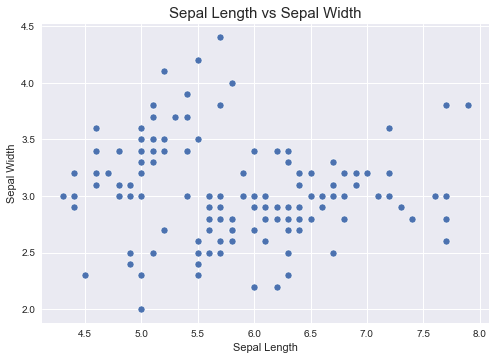

In [13]:
# Visulaization of data for clustering
matplotlib.pyplot.style.use('seaborn')
axis_xy = seaborn.scatterplot(x = test1['SepalLength'], y = test1['SepalWidth'], s = 50)
matplotlib.pyplot.title('Sepal Length vs Sepal Width', fontsize = 15)
axis_xy.set_xlabel('Sepal Length')
axis_xy.set_ylabel('Sepal Width')
matplotlib.pyplot.show()

In [14]:
def findCentroidAndDistance(k, data, iter):
    cent = [] #List of centroid points in data for k clusters
    euc_dist = [] #List of euclidean distances between 2 data points
    dist = 0
    for i in range(iter): #iter =3
        #Finding centroids in the data and appending into the CENT LIST
        data = shuffle(data)
        c = data.iloc[:k]
        cent.append(c)
    for c in cent:
        #Finding euclidean distance between 2 data points and appending it into the euc_dist list
        dist += np.sqrt(np.sum((c.iloc[0] - c.iloc[1]) ** 2))
        dist += np.sqrt(np.sum((c.iloc[1] - c.iloc[2]) ** 2))
        dist += np.sqrt(np.sum((c.iloc[2] - c.iloc[0]) ** 2))
        euc_dist.append(dist)
    return cent[np.argmax(euc_dist)].to_numpy()

In [15]:
k = 3
Y = findCentroidAndDistance(k, test1, 7)
dist_err = normDist(Y, np.zeros(Y.shape), None) 
clusters = np.zeros(len(X))
print(Y)

clusters = KMeans(k, X, Y, clusters, dist_err)
print(clusters)

[[5.5 2.5 4.  1.3]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]]
[2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 0. 2. 2. 1. 1. 1. 1. 1. 0.
 1. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 2. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0.]


In [16]:
#Output file with prediction data and k clusters
out1 = open('/Users/sanjanagovindu/Downloads/output1.csv', 'w')

out1.writelines( "%s\n" % int(x) for x in clusters)

out1.close()

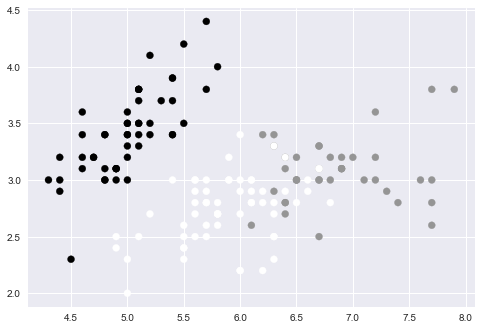

In [17]:
#Plot of the data of k = 3 clusters
matplotlib.pyplot.scatter(X[:, 0], X[:, 1], c = clusters)
matplotlib.pyplot.show()

In [18]:
# Based on Experiment values - Visulization of Vscore vs optimal K value in a plot for Iris Clustering
# plt.plot([2,3,4,5,7,10], [72,80,71,69,54,66], label="")
# plt.title("Iris Clustering - Vscore vs k value", fontsize = 15)
# plt.xlabel("k - Optimal values")
# plt.ylabel("VScore - Iris Clustering")
# plt.show()

### PART 2 - IMAGE CLUSTERING

In [19]:
# Loading Test Data for IMAGE Dataset
test2 = pd.read_csv("/Users/sanjanagovindu/Downloads/test_image.txt",sep=',',header=None)
# len(test2.index)
test2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test2.shape

(10740, 784)

In [21]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10740 entries, 0 to 10739
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 64.2 MB


In [22]:
X = test2.values

In [23]:
k = 10
Y = X[np.random.RandomState(50).permutation(np.array(X).shape[0])[:k]]
clusters = np.zeros(len(X))
dist_err = normDist(Y, np.zeros(Y.shape), None)
print(Y)

clusters = KMeans(k, X, Y, clusters, dist_err)
clusters = clusters + 1
print(clusters)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[7. 3. 3. ... 8. 8. 8.]


In [24]:
# Output file with prediction data and k clusters
out2 = open('/Users/sanjanagovindu/Downloads/output2.csv', 'w')

out2.writelines( "%s\n" % int(x) for x in clusters)

out2.close()

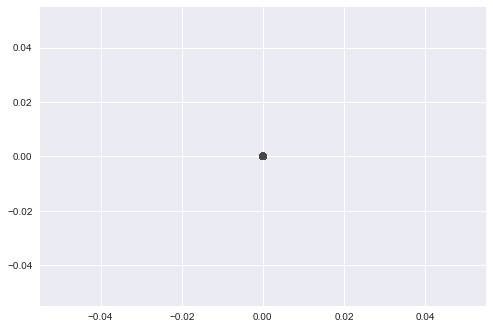

In [25]:
# Plot of the data 
matplotlib.pyplot.scatter(X[:, 0], X[:, 1], c = clusters)
matplotlib.pyplot.show()

In [26]:
# Based on Experiment values - Visulization of Vscore vs optimal K value in a plot for Image Clustering
# plt.plot([2,7,10,14,18], [27,36,69,29,14], label="")
# plt.title("Image Clustering - Vscore vs k value", fontsize = 15)
# plt.xlabel("k - Optimal values")
# plt.ylabel("VScore - Image Clustering")
# plt.show()